# 9. Feladatsor: megoldások

*(Lineáris többlépéses módszerek, Runge-Kutta módszerek, hibafogalmak a lineáris tesztegyenleten, módszer rendje Taylor-sorfejtéssel)*

### P1. Feladat


Oldjuk meg az alábbi kezdetiérték-problémát
$$
\begin{cases}
\dot x &= x \\
     x(0) &= 1
\end{cases}
$$
az EE módszerrel, $h=0.1$ lépéshosszal. 

Ábrázoljuk a kapott numerikus trajektóriát, valamint a pontos megoldás trajektóriáját is.

numerikus megoldas:  [1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


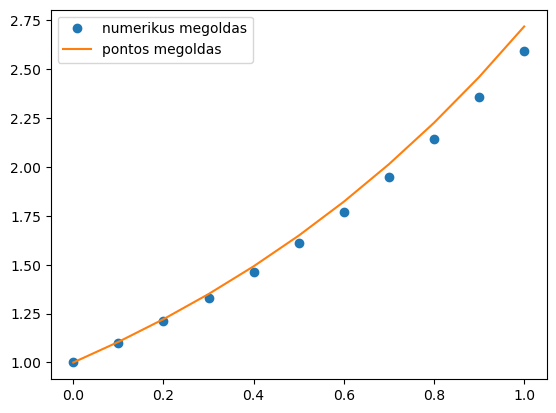

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#
ts = np.linspace(0, 1, 11)
# numerikus megoldas
xs = np.hstack([1, np.cumprod((1+np.diff(ts)*1))])
print("numerikus megoldas: ", xs)
# pontos megoldas
plt.plot(ts, xs, 'o', ts, np.exp(ts))
plt.legend(['numerikus megoldas', 'pontos megoldas'])
plt.show()

### P2. Feladat

Tekintsük az
$$\ddot x = - x$$
egyenletet.

a) Vezessük vissza egy elsőrendű rendszerre.

In [2]:
Vector = np.array

def f(x: Vector) -> Vector:
    # np.dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    return np.array([[ 0, 1], 
                     [-1, 0]]).dot(x)

b) Ábrázoljuk a kapott vektormezőt az egységnégyzeten.

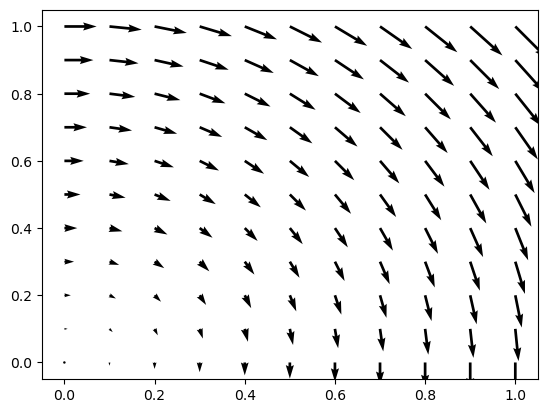

In [3]:
X, Y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0,1,11))
U, V = f(np.stack([X, Y]).swapaxes(0, 1))

plt.quiver(X, Y, U, V)
plt.show()

c) Alkalmazzuk erre a rendszerre a korábbi feladatokban szereplő módszerek közül az alábbiakat:

 * 4/a),
 * 4/b),
 * 5/c).

In [4]:
# az EE, IE, RK4 módszerekről van szó, melyek esetén egy numerikus időlépés megfelel egy mátriszal való szorzásnak

# a vektormezőt reprezentáló mátrix
A = np.array([[ 0, 1], [-1, 0]])
# lépéshossz
h = 0.01 * np.pi
# kezdetiérték (lehet más is)
x0 = np.array([0, 1])

In [5]:
# numerikus lépéseket reprezentáló mátrixok
# (pl.) x1 = EE_mtx * x0
def mk_RK4_mtx(A, h):
    I = np.eye(*A.shape)
    
    R1 = I
    R2 = I + h/2*A@R1
    R3 = I + h/2*A@R2
    R4 = I + h/1*A@R3

    return I + h/6*A@(R1 + 2*R2 + 2*R3 + R4)
    
EE_mtx = np.eye(*A.shape) + h*A
IE_mtx = np.linalg.inv(np.eye(*A.shape) - h*A)
RK4_mtx = mk_RK4_mtx(A, h)


d) Végezetül készítsünk egy ábrát, melyen összehasonlítjuk a három módszer által adott, $[0, 2\pi]$ időintervallumhoz tartozó trajektóriákat (a fázistérben), például $h=0.01\pi$ lépéshossz mellett.

In [6]:
from itertools import islice

def dotforever(A, x0):
    yield x0
    
    while True:
        x0 = A @ x0
        yield x0

take = islice

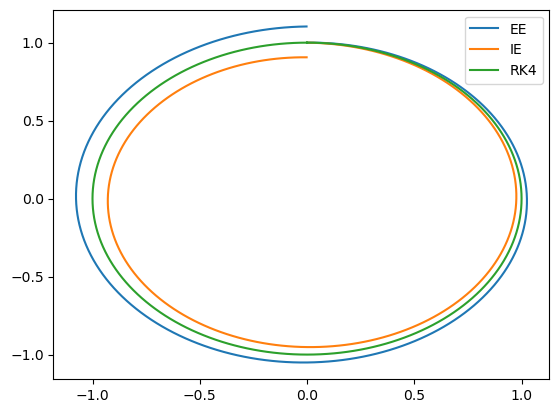

In [7]:
for label, time_step_mtx in zip(["EE", "IE", "RK4"], 
                                [EE_mtx, IE_mtx, RK4_mtx]):

    trajectory = dotforever(time_step_mtx, x0)
    
    first_few_steps = np.fromiter(
        take(trajectory, 201),
        dtype=np.dtype((np.double, 2))
    )
    
    plt.plot(first_few_steps[:, 0], first_few_steps[:, 1], label=label)
    
plt.legend()
plt.show()

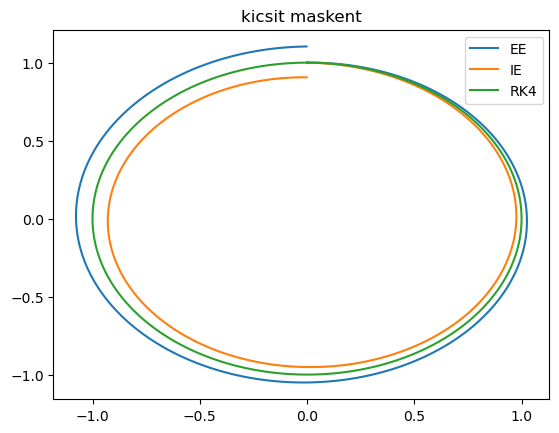

In [11]:
# így is lehet, ha valakinek szimpatikusabb ¯\_ (ツ)_/¯

xs = np.zeros((201, 2))
ys = np.zeros((201, 2))
zs = np.zeros((201, 2))

# EE
xs[0, :] = x0
for i in range(200):
    xs[i+1] = xs[i] + h*A@xs[i]

# IE
ys[0, :] = x0
for i in range(200):
    ys[i+1] = np.linalg.solve(np.eye(*A.shape) - h*A, ys[i])

# RK4
zs[0, :] = x0
for i in range(200):
    Y1 = zs[i]
    Y2 = zs[i] + h/2*A@Y1
    Y3 = zs[i] + h/2*A@Y2
    Y4 = zs[i] + h/1*A@Y3

    zs[i+1] = zs[i] + h/6*A@(Y1 + 2*Y2 + 2*Y3 + Y4)
    
plt.plot(xs[:, 0], xs[:, 1])
plt.plot(ys[:, 0], ys[:, 1])
plt.plot(zs[:, 0], zs[:, 1])
plt.legend(["EE", "IE", "RK4"])
plt.title("kicsit maskent")
plt.show()